# IPL Sold Players Analysis 
## Wasay Ahmed Shaikh
### Project 3

### Kindly let me know your feedback & feel free to connect 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('IPL_2023-22_Sold_Players.csv')
data.head()

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batter,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"


In [3]:
data.columns

Index(['Season', 'Name', 'Nationality', 'Type', 'Team', 'Price'], dtype='object')

### Show Unique values in individual columns

In [4]:
data.Nationality.unique()

array(['Indian ', 'Overseas '], dtype=object)

In [5]:
data.Season.unique()

array([2023, 2022], dtype=int64)

In [6]:
data.Team.unique()

array([' Chennai Super Kings', ' Delhi Capitals', ' Gujarat Titans',
       ' Kolkata Knight Riders', ' Lucknow Super Giants',
       ' Mumbai Indians', ' Punjab Kings', ' Rajasthan Royals',
       ' Royal Challengers Bangalore', ' Sunrisers Hyderabad'],
      dtype=object)

In [7]:
data.Type.unique()

array(['Batter ', 'All-Rounder ', 'Bowler ', 'Wicket-Keeper ', 'Batsman ',
       'Wicket Keeper '], dtype=object)

### Replace name to some unique ones for better understanding

In [8]:
data['Team'] = data['Team'].str.strip()

In [9]:
data['Team'].unique()

array(['Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
       'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
       'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad'], dtype=object)

In [10]:
data['Type'] = data['Type'].str.strip()

In [11]:
data['Type'].unique()

array(['Batter', 'All-Rounder', 'Bowler', 'Wicket-Keeper', 'Batsman',
       'Wicket Keeper'], dtype=object)

In [12]:
data['Type'] = data['Type'].replace('Batter', 'Batsman')
data['Type'] = data['Type'].replace('Wicket Keeper', 'Wicket-Keeper')

In [13]:
data['Type'].unique()

array(['Batsman', 'All-Rounder', 'Bowler', 'Wicket-Keeper'], dtype=object)

### Checking of Duplicate Values

In [14]:
data.duplicated().sum()

0

In [15]:
data['Team'].isna().sum()

0

In [16]:
data['Nationality'].isna().sum()

0

In [17]:
data['Type'].value_counts()

All-Rounder      106
Bowler            96
Batsman           48
Wicket-Keeper     34
Name: Type, dtype: int64

In [18]:
data['Nationality'].value_counts()

Indian       188
Overseas      96
Name: Nationality, dtype: int64

In [19]:
data['Season'].value_counts()

2022    204
2023     80
Name: Season, dtype: int64

In [20]:
data.head()

,Season,Name,Nationality,Type,Team,Price
0,2023,Ajinkya Rahane,Indian,Batsman,Chennai Super Kings,"50,00,000"
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,"1,00,00,000"
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,"20,00,000"
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,"60,00,000"


### Total number of null values in each column

In [21]:
null_counts = data.isnull().sum()
for column in data.columns:
    count = null_counts[column]
    print(f'Total number of null values in {column} column: {count}')

Total number of null values in Season column: 0
Total number of null values in Name column: 0
Total number of null values in Nationality column: 0
Total number of null values in Type column: 0
Total number of null values in Team column: 0
Total number of null values in Price column: 0


In [22]:
data.dtypes

Season          int64
Name           object
Nationality    object
Type           object
Team           object
Price          object
dtype: object

#### Before replacing 

In [23]:
data['Price'].head()

0      50,00,000 
1      20,00,000 
2    1,00,00,000 
3      20,00,000 
4      60,00,000 
Name: Price, dtype: object

In [24]:
data['Price'] = data['Price'].str.replace(',','').astype('int')

#### After replacing 

In [25]:
data['Price'].head() 

0     5000000
1     2000000
2    10000000
3     2000000
4     6000000
Name: Price, dtype: int32

## Create a function to shorten team names so that we can use them with ease.

In [26]:
def short_name(name):
    list_name = []
    for n in name:
        shortname = ""
        l = n.split(" ")
        for i in range(len(l)):
            shortname = shortname+l[i][0]
        list_name.append(shortname)
    return list_name

In [27]:
data['Team name'] = short_name(data['Team']);

In [28]:
data['Team name'].unique()

array(['CSK', 'DC', 'GT', 'KKR', 'LSG', 'MI', 'PK', 'RR', 'RCB', 'SH'],
      dtype=object)

In [29]:
data.head()

,Season,Name,Nationality,Type,Team,Price,Team name
0,2023,Ajinkya Rahane,Indian,Batsman,Chennai Super Kings,5000000,CSK
1,2023,Bhagath Varma,Indian,All-Rounder,Chennai Super Kings,2000000,CSK
2,2023,Kyle Jamieson,Overseas,Bowler,Chennai Super Kings,10000000,CSK
3,2023,Ajay Mandal,Indian,All-Rounder,Chennai Super Kings,2000000,CSK
4,2023,Nishant Sindhu,Indian,All-Rounder,Chennai Super Kings,6000000,CSK


## Visualization 

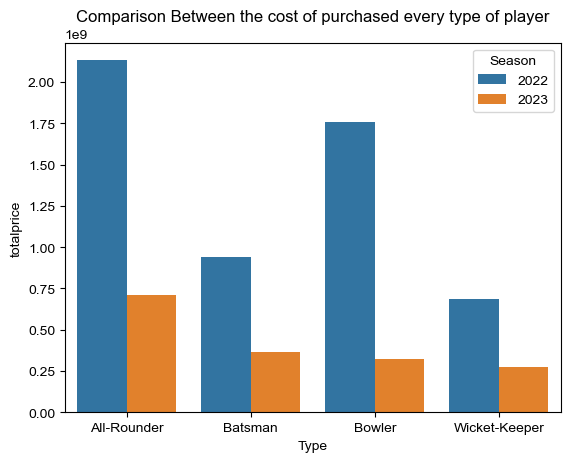

In [30]:
ndf=data.groupby(['Type', 'Season']).agg(
    totalprice= ('Price', 'sum')).reset_index()

sns.barplot(data=ndf, x=ndf['Type'], 
    y=ndf['totalprice'], hue=ndf['Season']).set_title(
    'Comparison Between the cost of purchased every type of player')
sns.set(font_scale= 1.25)

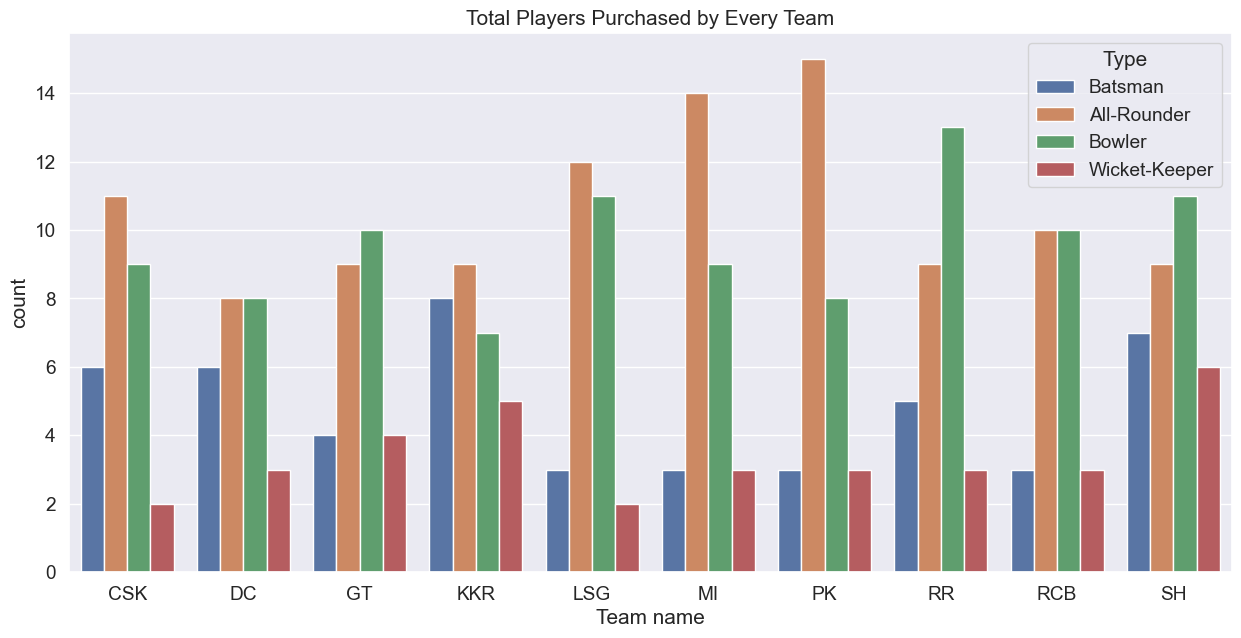

In [31]:
fig, ax = plt.subplots(figsize = (15,7))
sns.countplot(data=data, x=data['Team name'], hue= data['Type'], ax=ax).set_title(
    'Total Players Purchased by Every Team')
sns.set(font_scale = 1.25)

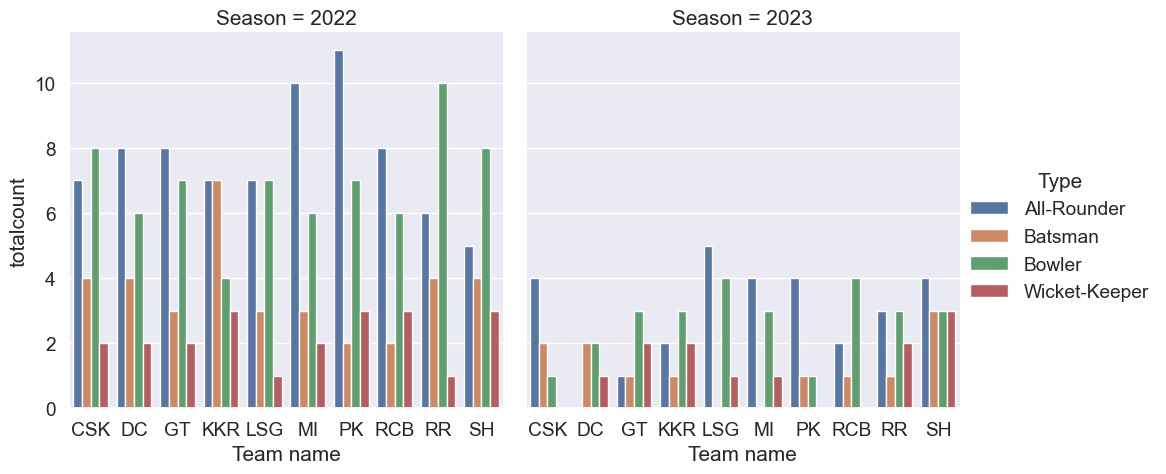

In [32]:
ndf=data.groupby(['Season', 'Team name', 'Type']).agg(
    totalcount= ('Type', 'count')).reset_index()

sns.catplot(data=ndf, x='Team name', y='totalcount', 
            hue='Type', col = 'Season', kind = 'bar')
sns.set(font_scale= 1.25)

### Point Plot 

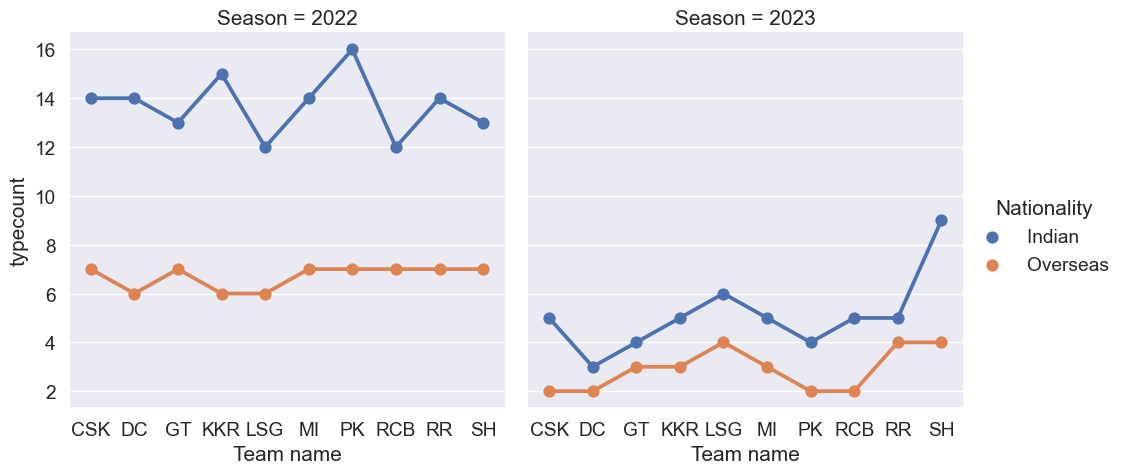

In [33]:
ndf=data.groupby(['Season', 'Team name', 'Nationality']).agg(
    typecount= ('Nationality', 'count')).reset_index()

sns.catplot(data=ndf, x='Team name', y='typecount', hue='Nationality', 
            col = 'Season', kind = 'point')
sns.set(font_scale= 1.25)

### Bar Plot

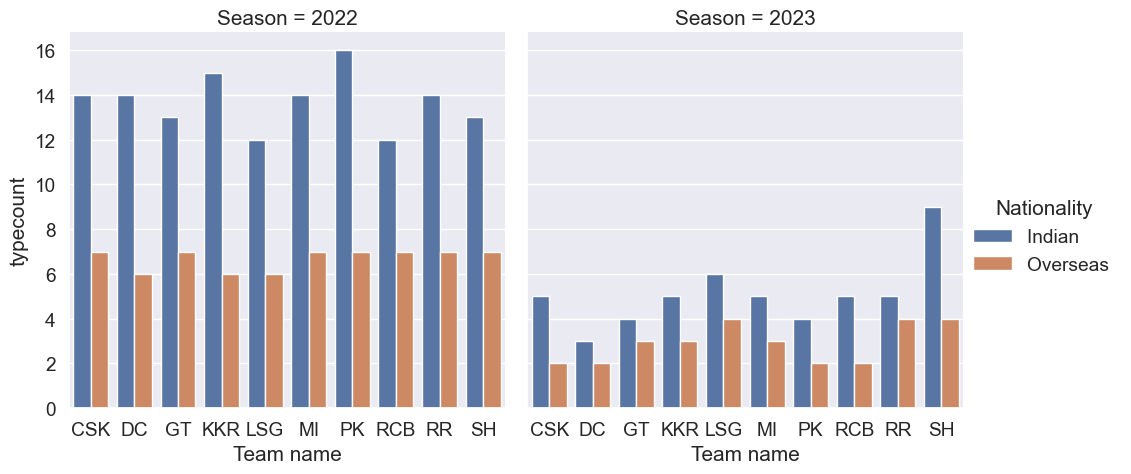

In [34]:
ndf=data.groupby(['Season', 'Team name', 'Nationality']).agg(
    typecount= ('Nationality', 'count')).reset_index()

sns.catplot(data=ndf, x='Team name', y='typecount', hue='Nationality', 
            col = 'Season', kind = 'bar')
sns.set(font_scale= 1.25)

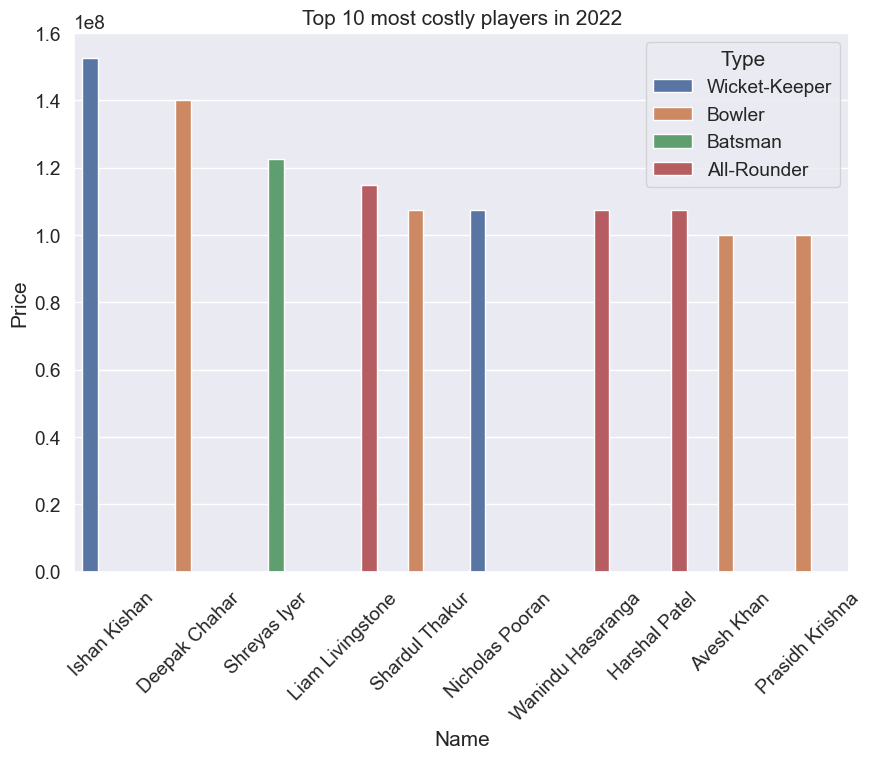

In [35]:
exp_player_data = data.loc[data.Season == 2022].sort_values(
    ['Price'], ascending = False).head(10)

fig, ax = plt.subplots (figsize = (10,7))

sns.barplot(data = exp_player_data, x = 'Name', y = 'Price',
    hue='Type', ax= ax).set_title('Top 10 most costly players in 2022')
plt.xticks(rotation = 45)
sns.set(font_scale=1)


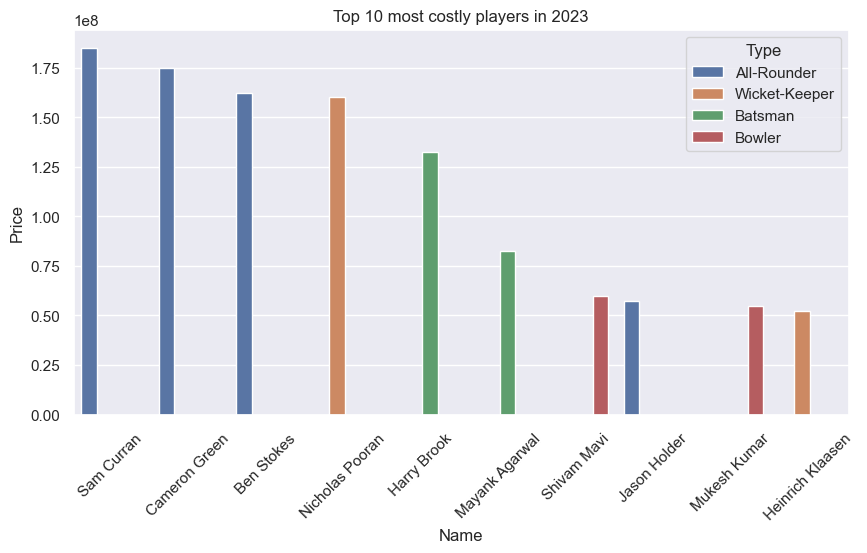

In [36]:
exp_player_data = data.loc[data.Season == 2023].sort_values(
    ['Price'], ascending = False).head(10)

fig, ax = plt.subplots (figsize = (10,5))

sns.barplot(data = exp_player_data, x = 'Name', y = 'Price',
        hue='Type', ax= ax).set_title('Top 10 most costly players in 2023')
plt.xticks(rotation = 45)
sns.set(font_scale=1)


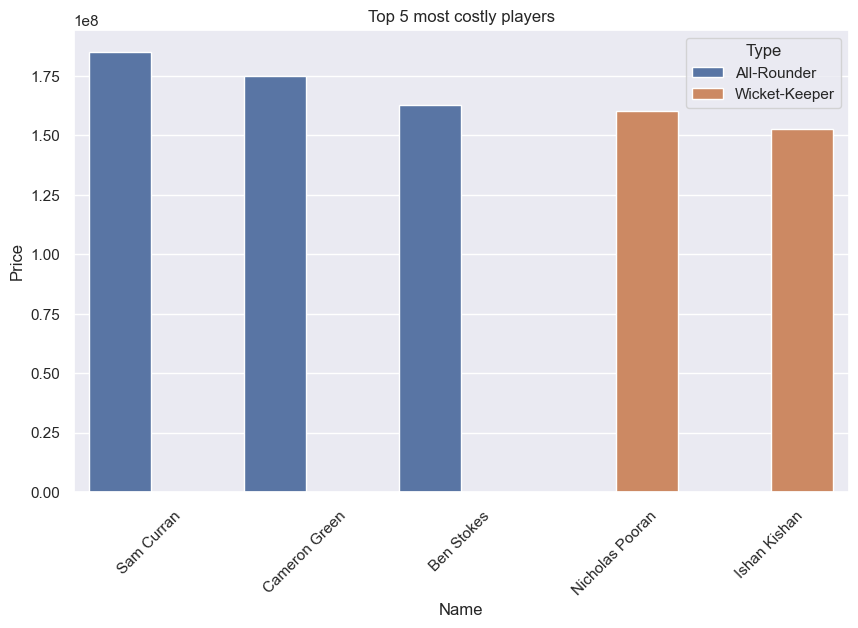

In [37]:
fig, ax = plt.subplots (figsize = (10,6))
exp_player_data = data.sort_values(['Price'], ascending = False).head()

sns.barplot(data = exp_player_data, x = 'Name', y = 'Price', 
        hue='Type', ax= ax).set_title('Top 5 most costly players')
plt.xticks(rotation = 45)
sns.set(font_scale=1)